# Cluestar

Poetry added dependencies:
- cluestar
- umap-learn (not umap)
- keybert

## Tweeteval emoji dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ..
%cd ..

c:\Users\MartijnElands\Documents\Thesis\twister


In [ ]:
from src.CustomDataLoader import CustomDataLoader

loader = CustomDataLoader(name="tweet_eval", subset="emoji")

dataset = loader.load_huggingface_data()
subsets = list(dataset.keys())
dfs = loader.to_dataframe(data_dict=dataset, subsets=subsets)

In [4]:
for key in dfs.keys():
    dfs[key] = loader.selectEqualFewshots(dataframe=dfs[key], shots=30, seed=20, text_name="text", label_name="label")
    sampled_texts = dfs[key]["text"].to_list()

    print('Set:', key)
    print(sampled_texts[:3])
    print()

Set: train
['️weddings#sanfrancisco#weddings @ Sequoyah Country Club', '#Repost felishatolentino ・・・Shot @user for the Dec/Jan issue of @user ️ special…', '02.08.16 ️ we may never leave#airstream #airstreamlife #adventure #adventureon #camping #fun…']

Set: test
['One of my greatest supporters ️ @user @ Iowa Lakes Community College', 'Some of my favorite shots from the mondavi show ️ ️ @ Mondavi Center', 'Cheeks and Fists ️ @ Jersey Village, Texas']

Set: validation
["@user @user it sad seeing a loved one with Alzheimer's disease, as a RNA you see it a lot. Wish I could help them more", 'My baby brother is growing up too fast!!! My great aunt Ines &amp; my grandmother #easter…', '#twinning #thanksgiving #bestsisterever @ Mom and Dads (Davila)']



We're going to pretend like we might want to predict labels in this data. What might be some good labels? 

## Arrays

Let's try to plot it through arrays with TF-IDF

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

pipe = make_pipeline(TfidfVectorizer(), TruncatedSVD())

X = pipe.fit_transform(sampled_texts)

## Visualize

We can move through the space

In [6]:
from cluestar import plot_text

plot_text(X, sampled_texts, color_words=["love", "laughing", "fire", "cool"])

alt.HConcatChart(...)

## Improve through UMAP

In [7]:
from umap import UMAP

pipe = make_pipeline(TfidfVectorizer(), UMAP(min_dist=0.1, n_neighbors=5))

X = pipe.fit_transform(sampled_texts)

plot_text(X, sampled_texts)

alt.HConcatChart(...)

Adding colours to the classes to see embedding space

In [8]:
plot_text(X, sampled_texts, color_words=["heart", "love", "affection", "romantic", "support", "gratitude", "friends", "family"])

alt.HConcatChart(...)

In [9]:
plot_text(X, sampled_texts, color_words=["joy", "lmfao", "humor", "laughter", "laugh", "funny", "lighthearted"])

alt.HConcatChart(...)

# TF-IDF pairwise similarities of ChatGPT

## Exploration

These descriptions were given by ChatGPT:

❤: The red heart emoji usually signifies love and affection towards someone or something. It is often used in romantic contexts or to express love, support, or gratitude towards friends and family.

😍: The heart eyes emoji typically expresses admiration, attraction, or love towards something or someone. It can also indicate excitement or enthusiasm towards something.

😂: The face with tears of joy emoji usually expresses humor or laughter. It is often used to indicate that something is funny or to convey a lighthearted tone in a message.

💕: The two hearts emoji typically expresses love or affection between two people. It can also indicate a close friendship or a special bond.

🔥: The fire emoji usually indicates that something is hot or on fire. It can also be used to express excitement, enthusiasm, or intensity towards something.

😊: The smiling face with smiling eyes emoji typically expresses happiness, contentment, or friendliness. It is often used to convey positive emotions or to create a friendly tone in a message.

😎: The cool face emoji usually signifies confidence, style, or attitude. It can also indicate a sense of being cool or relaxed in a situation.

✨: The sparkles emoji usually signifies something magical or special. It can also indicate excitement or celebration.

💙: The blue heart emoji typically signifies trust, loyalty, and harmony. It can also express love or support towards something or someone.

😘: The face blowing a kiss emoji typically expresses love, affection, or gratitude towards someone. It can also be used to convey flirtatiousness or playfulness.

📷: The camera emoji usually represents photography or taking a photo. It can also indicate a desire to capture a moment or memory.

🇺🇸: The flag of the United States emoji usually signifies patriotism, national pride, or celebration of American culture or events.

☀: The sun emoji usually signifies warmth, brightness, or happiness. It can also be used to indicate a sunny day or summer weather.

💜: The purple heart emoji typically signifies love, support, or compassion. It can also express admiration or gratitude towards someone or something.

😉: The winking face emoji usually signifies playfulness, sarcasm, or flirting. It can also be used to create a friendly or humorous tone in a message.

💯: The hundred points emoji usually signifies perfection, excellence, or achievement. It can also indicate agreement or emphasis towards something.

😁: The grinning face with smiling eyes emoji usually expresses happiness, joy, or satisfaction. It is often used to create a positive or friendly tone in a message.

🎄: The Christmas tree emoji usually signifies Christmas or the holiday season. It can also be used to convey a festive or celebratory tone in a message.

📸: The camera with flash emoji usually represents photography or taking a photo with flash. It can also indicate a desire to capture a moment or memory in a dramatic or exciting way.

😜: The face with tongue emoji usually expresses playfulness, joking, or teasing. It can also indicate a sense of being silly or goofy.

Now, let's fit a TF-IDF model on it and have a look on intial similar sentences.

In [10]:
#Run this if you run the Cluestar part
%cd data

c:\Users\MartijnElands\Documents\Thesis\twister\data_exploration


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
text_file = "./chat_gpt.txt"

with open('chat_gpt.txt') as f:
    lines = [line.rstrip() for line in f] 
f.close()

tfidf = TfidfVectorizer().fit_transform(lines)
# no need to normalize, since Vectorizer will return normalized tf-idf
pairwise_similarity = tfidf * tfidf.T

<Axes: >

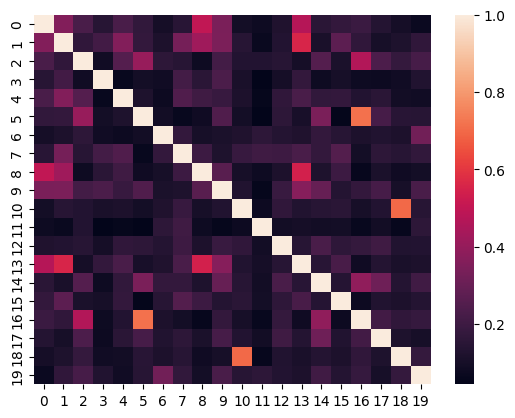

In [12]:
import seaborn as sns

sns.heatmap(pairwise_similarity.toarray()) # type: ignore

## Results

General observation: there defenitly seems to be similarities between emoji predictions, however, some more than others (see light areas).

Other observations:
- 0 and 8
- 0 and 13
- 1 and 13
- 2 and 16
- 5 and 16
- 8 and 13
- 10 and 18

seem to be correlated more than others.

0: ❤ and 8: 💙

The red heart emoji usually signifies love and affection towards someone or something. It is often used in romantic contexts or to express love, support, or gratitude towards friends and family.

The blue heart emoji typically signifies trust, loyalty, and harmony. It can also express love or support towards something or someone.

------------------------

0: ❤ and 13: 💜

The red heart emoji usually signifies love and affection towards someone or something. It is often used in romantic contexts or to express love, support, or gratitude towards friends and family.

The purple heart emoji typically signifies love, support, or compassion. It can also express admiration or gratitude towards someone or something.

------------------------

1: 😍 and 13: 💜

The heart eyes emoji typically expresses admiration, attraction, or love towards something or someone. It can also indicate excitement or enthusiasm towards something.

The purple heart emoji typically signifies love, support, or compassion. It can also express admiration or gratitude towards someone or something.

------------------------

2: 😂 and 16: 😁

The face with tears of joy emoji usually expresses humor or laughter. It is often used to indicate that something is funny or to convey a lighthearted tone in a message.

The grinning face with smiling eyes emoji usually expresses happiness, joy, or satisfaction. It is often used to create a positive or friendly tone in a message.

------------------------

5: 😊 and 16: 😁

The smiling face with smiling eyes emoji typically expresses happiness, contentment, or friendliness. It is often used to convey positive emotions or to create a friendly tone in a message.

The grinning face with smiling eyes emoji usually expresses happiness, joy, or satisfaction. It is often used to create a positive or friendly tone in a message.

------------------------

8: 💙 and 13: 💜

The blue heart emoji typically signifies trust, loyalty, and harmony. It can also express love or support towards something or someone.

The purple heart emoji typically signifies love, support, or compassion. It can also express admiration or gratitude towards someone or something.

------------------------

10: 📷 and 18: 📸

The camera emoji usually represents photography or taking a photo. It can also indicate a desire to capture a moment or memory.

The camera with flash emoji usually represents photography or taking a photo with flash. It can also indicate a desire to capture a moment or memory in a dramatic or exciting way.

------------------------

--> Let's try and find if there is a clear seperation cluster

In [13]:
%cd ..

c:\Users\MartijnElands\Documents\Thesis\twister


In [14]:
from src.CustomDataLoader import CustomDataLoader

loader = CustomDataLoader(name="tweet_eval", subset="emoji")

dataset = loader.load_huggingface_data()
subsets = list(dataset.keys())
dfs = loader.to_dataframe(data_dict=dataset, subsets=subsets)

for key in dfs.keys():
    dfs[key] = loader.selectEqualFewshots(dataframe=dfs[key], shots=100, seed=20, text_name="text", label_name="label")

Found cached dataset tweet_eval (C:/Users/MartijnElands/.cache/huggingface/datasets/tweet_eval/emoji/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)
100%|██████████| 3/3 [00:01<00:00,  1.52it/s]


In [15]:
import pandas as pd

def extract_specific_classes(dfs: dict[str, pd.DataFrame], classes: list, dfs_type: str = "train") -> pd.DataFrame:
    df = dfs[dfs_type]
    return df[df["label"].isin(classes)]

df = extract_specific_classes(dfs, [0, 8])
sampled_texts = df["text"].to_list()

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from cluestar import plot_text

pipe = make_pipeline(TfidfVectorizer(), TruncatedSVD())
X = pipe.fit_transform(sampled_texts)
plot_text(X, sampled_texts)

alt.HConcatChart(...)

In [18]:
from umap import UMAP

pipe = make_pipeline(TfidfVectorizer(), UMAP(min_dist=0.05, n_neighbors=25))
X = pipe.fit_transform(sampled_texts)
plot_text(X, sampled_texts)

alt.HConcatChart(...)

In [19]:
df = extract_specific_classes(dfs, [0, 13])
sampled_texts = df["text"].to_list()

In [20]:
pipe = make_pipeline(TfidfVectorizer(), TruncatedSVD())
X = pipe.fit_transform(sampled_texts)
plot_text(X, sampled_texts)

alt.HConcatChart(...)

In [21]:
pipe = make_pipeline(TfidfVectorizer(), UMAP())
#pipe = make_pipeline(TfidfVectorizer(), UMAP(min_dist=0.75, n_neighbors=5))
X = pipe.fit_transform(sampled_texts)
plot_text(X, sampled_texts)

alt.HConcatChart(...)

In [22]:
from collections import Counter
sets = []
for i in [0, 13]:
    df = extract_specific_classes(dfs, [i])
    sampled_texts = df["text"].to_list()
    sampled_words = []
    for review in sampled_texts:
        words = review.split(" ")
        sampled_words.extend(words)
    #sampled_words = [word.split(" ") for word in sampled_texts]
    sets.append(sampled_words)
    print(Counter(sampled_words))

Counter({'️': 79, '@': 53, 'the': 26, 'my': 22, '@user': 20, 'of': 17, 'a': 16, 'for': 15, 'in': 13, 'with': 11, 'San': 11, 'to': 11, 'on': 10, 'I': 9, 'and': 9, 'you': 8, 'love': 8, 'California': 8, 'this': 7, 'is': 7, 'what': 6, 'by': 5, 'The': 5, 'are': 5, 'Los': 5, 'we': 4, '(@': 4, 'our': 4, '-': 4, 'be': 4, 'This': 4, 'at': 4, 'Love': 4, 'best': 4, 'from': 3, 'Some': 3, 'get': 3, 'Ever': 3, 'back': 3, '2016': 3, 'We': 3, 'Beach': 3, 'go': 3, 'Francisco': 3, 'CA)': 3, 'Golden': 3, 'will': 3, '️️': 3, 'Angeles': 3, 'so': 3, '️…': 3, 'My': 3, 'Happy': 3, 'first': 3, 'ktir': 3, '#Repost': 2, 'never': 2, 'her': 2, 'still': 2, 'have': 2, 'Nevada': 2, 'awesome': 2, 'has': 2, 'Grand': 2, 'Las': 2, 'helping': 2, 'new': 2, '#music': 2, 'couple': 2, 'very': 2, '️.': 2, 'Room': 2, '️the': 2, 'Zelda': 2, 'Of': 2, 'marked': 2, 'down': 2, 'Accord': 2, 'love!': 2, 'that': 2, 'Day': 2, 'Diego,': 2, 'International': 2, 'Airport': 2, 'Francisco,': 2, 'Santa': 2, 'At': 2, 'Gate': 2, '#sanfrancisco':

In [23]:
set(sets[0]).difference(set(sets[1]))

{'!!!',
 '##HTHarvest',
 '#1LUV',
 '#AmazingWoman',
 '#AngelinDisguise',
 '#Bella',
 '#Clearbluesky',
 '#Coronado',
 '#DarlingWeekend',
 '#Delmar',
 '#Disneyland',
 '#ExploreSanDiego',
 '#FamilyGoals',
 '#Hollywood',
 '#I',
 '#IceT',
 '#IcedTea',
 '#Isa',
 '#LA',
 '#LAVALLEY',
 '#ManCrushEveryday',
 '#MountBaker',
 '#Oakland',
 '#Pie',
 '#PowerToPlay!',
 '#Repost',
 '#SFV',
 '#SanFrancisco',
 '#ToysForHomeless.',
 '#USA',
 '#acting',
 '#adtr…',
 '#adventure',
 '#adventureon',
 '#airstreamlife',
 '#aljarreau',
 '#amor',
 '#anniversary',
 '#awsreplay',
 '#ballin',
 '#besthairstylist',
 '#bestmomever',
 '#bloggerlife',
 '#brysons',
 '#burbank',
 '#caffeine2306',
 '#california',
 '#camping',
 '#danceontheroof',
 '#dessert',
 '#dinnertime',
 '#dogsofseattle…',
 '#dogstagram…',
 '#facebook.',
 '#farniente',
 '#firsttimetodisneyland',
 '#foodlover',
 '#fortheluvofmusic',
 '#fun',
 '#fun…',
 '#goomba',
 '#goombs',
 '#happyanniversary',
 '#happyat29',
 '#happybirthdaygoombs',
 '#hiking',
 '#hik

In [48]:
from collections import Counter
import numpy as np

sets = []
for i in range(0, np.max(dfs['train']['label'])+1):
    df = extract_specific_classes(dfs, [i])
    sampled_texts = df["text"].to_list()
    sampled_words = []
    for review in sampled_texts:
        words = review.split(" ")
        sampled_words.extend(words)
    #sampled_words = [word.split(" ") for word in sampled_texts]
    sets.append(sampled_words)
    print(Counter(sampled_words))

Counter({'️': 79, '@': 53, 'the': 26, 'my': 22, '@user': 20, 'of': 17, 'a': 16, 'for': 15, 'in': 13, 'with': 11, 'San': 11, 'to': 11, 'on': 10, 'I': 9, 'and': 9, 'you': 8, 'love': 8, 'California': 8, 'this': 7, 'is': 7, 'what': 6, 'by': 5, 'The': 5, 'are': 5, 'Los': 5, 'we': 4, '(@': 4, 'our': 4, '-': 4, 'be': 4, 'This': 4, 'at': 4, 'Love': 4, 'best': 4, 'from': 3, 'Some': 3, 'get': 3, 'Ever': 3, 'back': 3, '2016': 3, 'We': 3, 'Beach': 3, 'go': 3, 'Francisco': 3, 'CA)': 3, 'Golden': 3, 'will': 3, '️️': 3, 'Angeles': 3, 'so': 3, '️…': 3, 'My': 3, 'Happy': 3, 'first': 3, 'ktir': 3, '#Repost': 2, 'never': 2, 'her': 2, 'still': 2, 'have': 2, 'Nevada': 2, 'awesome': 2, 'has': 2, 'Grand': 2, 'Las': 2, 'helping': 2, 'new': 2, '#music': 2, 'couple': 2, 'very': 2, '️.': 2, 'Room': 2, '️the': 2, 'Zelda': 2, 'Of': 2, 'marked': 2, 'down': 2, 'Accord': 2, 'love!': 2, 'that': 2, 'Day': 2, 'Diego,': 2, 'International': 2, 'Airport': 2, 'Francisco,': 2, 'Santa': 2, 'At': 2, 'Gate': 2, '#sanfrancisco':

In [49]:
unique_sets = []

for i in range(0, len(sets)):
    set_1 = set(sets[i])
    temp_set = set_1
    for j in range(0, len(sets)):
        set_2 = set(sets[j])
        
        #could be combined into one if-statement
        if set_1 == set_2:
            pass
        else:
            temp_set = set_1.difference(set_2)

    unique_sets.append(temp_set)

In [53]:
len(sets[0])

1269

In [52]:
len(unique_sets[0])

607

# KeyBERT

In [63]:
from keybert import KeyBERT

for i in range(0, np.max(dfs['train']['label'])+1):
    kw_model = KeyBERT()

    df = extract_specific_classes(dfs, [i])
    sampled_texts = df["text"].to_list()

    #doc = ' SEP '.join(sampled_texts)
    doc = ' '.join(sampled_texts)
    print(kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 1), stop_words=None))

[('weddings', 0.4508), ('vegas', 0.3943), ('honeymooners', 0.3907), ('bridal', 0.376), ('bella', 0.324)]
[('santaclause', 0.3974), ('christmasevedatenight', 0.3941), ('claremont', 0.3711), ('sanfrancisco', 0.339), ('bakery', 0.3361)]
[('chicoca', 0.312), ('lmaoo', 0.3108), ('los', 0.3093), ('chico', 0.3058), ('paparazzi', 0.2967)]
[('san', 0.3624), ('los', 0.3498), ('wedding', 0.3497), ('disneyland', 0.3453), ('weddingflower', 0.3413)]
[('italy', 0.3753), ('belgium', 0.3249), ('mixtape', 0.3154), ('martialarts', 0.3078), ('capcomcup2016', 0.3063)]
[('holiday', 0.401), ('celebrating', 0.3816), ('merry', 0.3785), ('holidays', 0.3658), ('celebration', 0.3483)]
[('hollywood', 0.3702), ('las', 0.3668), ('beach', 0.3521), ('sunshine', 0.3304), ('san', 0.3299)]
[('creativity', 0.3619), ('creative', 0.3528), ('disneylandhotel', 0.3294), ('tribute', 0.3221), ('beautymaker', 0.3179)]
[('san', 0.4347), ('sf', 0.4153), ('spartan', 0.3855), ('california', 0.3771), ('cali', 0.3714)]
[('anniversary',

Additionally, remove stopwords

In [66]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MartijnElands\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [69]:
from keybert import KeyBERT

for i in range(0, np.max(dfs['train']['label'])+1):
    kw_model = KeyBERT()

    df = extract_specific_classes(dfs, [i])
    sampled_texts = df["text"].to_list()

    #doc = ' SEP '.join(sampled_texts)
    doc = ' '.join(sampled_texts)
    print(kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 1), stop_words=stopwords.words('english')))

[('weddings', 0.4508), ('vegas', 0.3943), ('honeymooners', 0.3907), ('bridal', 0.376), ('bella', 0.324)]
[('santaclause', 0.3974), ('christmasevedatenight', 0.3941), ('claremont', 0.3711), ('sanfrancisco', 0.339), ('bakery', 0.3361)]
[('chicoca', 0.312), ('lmaoo', 0.3108), ('los', 0.3093), ('chico', 0.3058), ('paparazzi', 0.2967)]
[('san', 0.3624), ('los', 0.3498), ('wedding', 0.3497), ('disneyland', 0.3453), ('weddingflower', 0.3413)]
[('italy', 0.3753), ('belgium', 0.3249), ('mixtape', 0.3154), ('martialarts', 0.3078), ('capcomcup2016', 0.3063)]
[('holiday', 0.401), ('celebrating', 0.3816), ('merry', 0.3785), ('holidays', 0.3658), ('celebration', 0.3483)]
[('hollywood', 0.3702), ('las', 0.3668), ('beach', 0.3521), ('sunshine', 0.3304), ('san', 0.3299)]
[('creativity', 0.3619), ('creative', 0.3528), ('disneylandhotel', 0.3294), ('tribute', 0.3221), ('beautymaker', 0.3179)]
[('san', 0.4347), ('sf', 0.4153), ('spartan', 0.3855), ('california', 0.3771), ('cali', 0.3714)]
[('anniversary',